In [154]:
from utils import *
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [250]:
df = loadData()
df.drop(columns=["Unnamed: 0"],inplace=True)  
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


# Question 1

## 1.1

In [251]:
#Assigning quantitative values to qualitative features
diamondsDF = df.copy(deep=True)

cutLabels = ["Fair","Good","Very Good", "Premium", "Ideal"]
for i in range(len(cutLabels)):
    diamondsDF['cut'].replace(cutLabels[i],i+1,inplace=True)

clarityLabels = ["I1","SI2","SI1","VS2","VS1","VVS2","VVS1","IF"]
for i in range(len(clarityLabels)):
    diamondsDF['clarity'].replace(clarityLabels[i],i+1,inplace=True)

colorLabels = (list(string.ascii_uppercase[3:10]))
for i in range (len(colorLabels)):
    diamondsDF['color'].replace(colorLabels[i],len(colorLabels)-i,inplace=True)
diamondsDF.head()


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,327,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,328,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,337,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,338,4.34,4.35,2.75


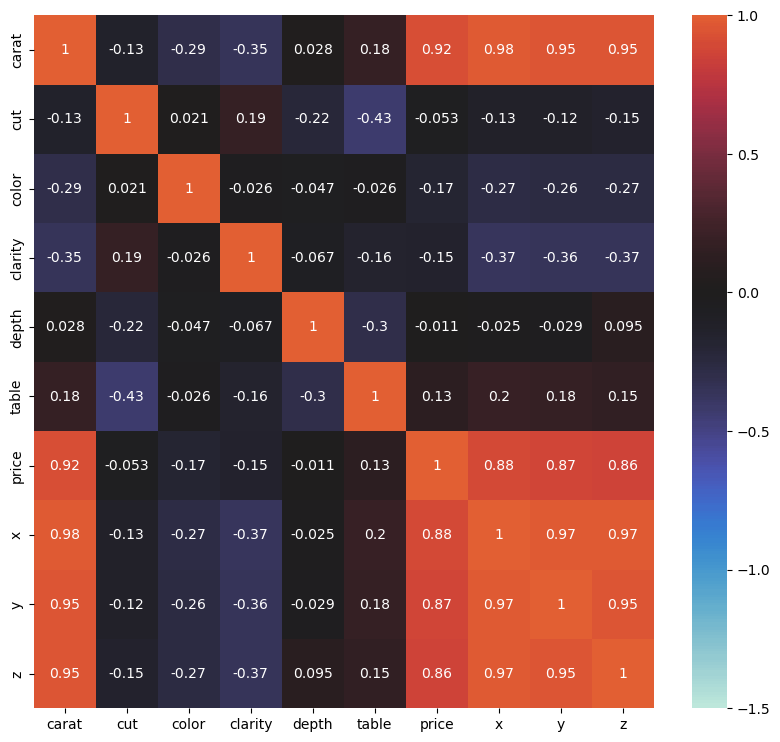

In [252]:
plt.figure(figsize=(10,9))
corrHeatmap = sns.heatmap(diamondsDF.corr(),vmin=-1.5,center=0,annot=True)


In [253]:
[diamondsDF.corr()['price']]

[carat      0.921591
 cut       -0.053493
 color     -0.172509
 clarity   -0.146802
 depth     -0.010648
 table      0.127134
 price      1.000000
 x          0.884436
 y          0.865422
 z          0.861250
 Name: price, dtype: float64]

We see by observation that the variable other than **price** that has the highest correlation with the **price** of a diamond is **carat**—the weight of the diamond.  

There is a very positive correlation between the **price** of a diamond and its weight, as well as its size. We know this because **x**,**y**,**z** which refer to the length, width and depth of the diamond,  have very similar positive correlations with **price** of a diamond. **table** has a small positive correlation, meaning it doesn't affect the price of the diamond very much, but it does have a slight positive effect. Finally, **depth** has a correlation near zero, meaning that it has almost no effect on **price**.

Next, let us consider the qualitative features. We see negative covariance values between clarity, 

## 1.2

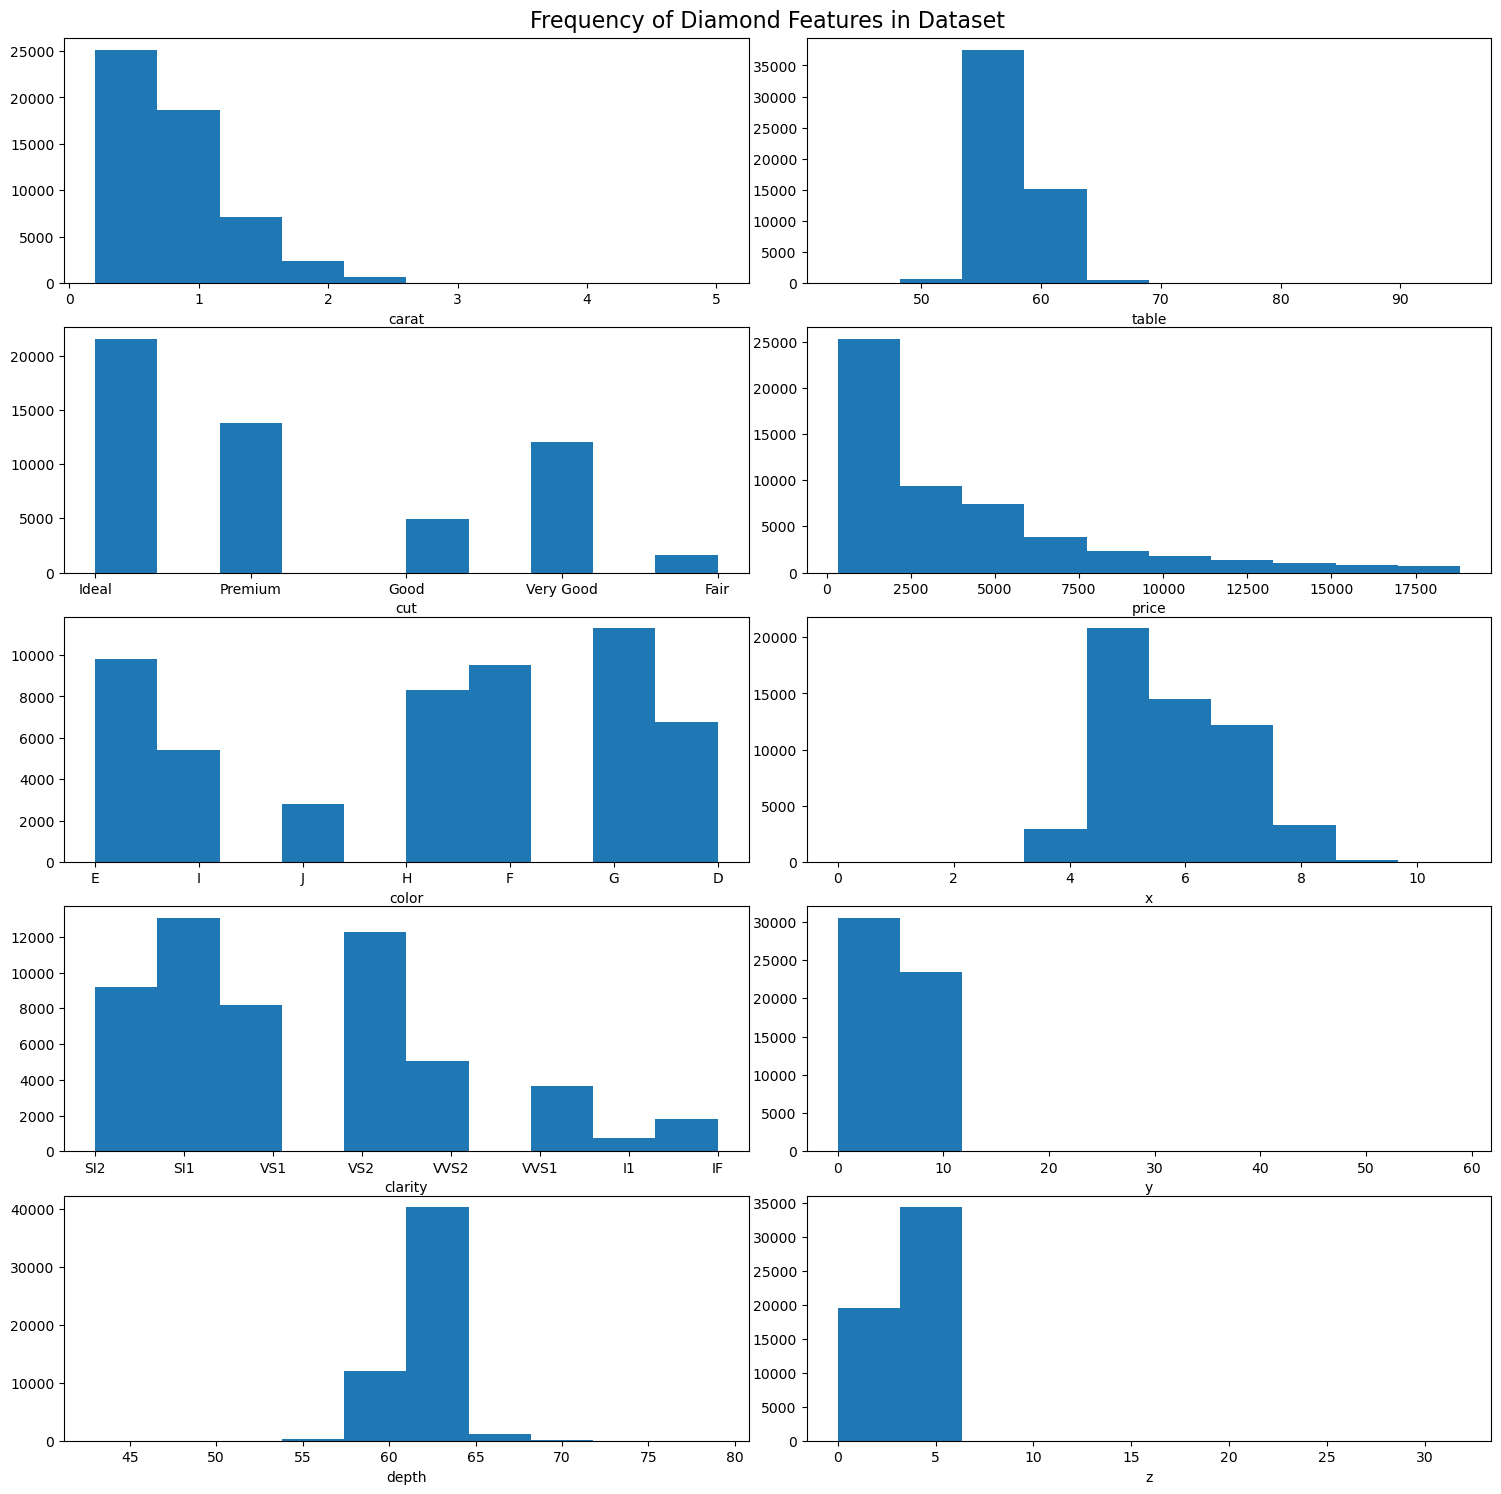

In [256]:
numRows = len(df.columns)//2
fig, axs = plt.subplots(numRows, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Frequency of Diamond Features in Dataset",fontsize=16)
fig.tight_layout()
i=0
j=0
for x in df.columns:
    if i == numRows:
        j=1
    axs[i-numRows*j,j].hist(df[x])
    axs[i-numRows*j,j].set_xlabel(x)
    i+=1

<Axes: title={'center': 'price'}, xlabel='color'>

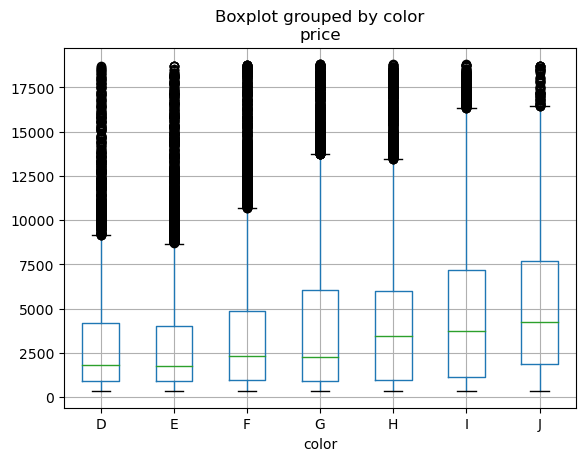

In [243]:
df.boxplot(column='price',by='color')

<Axes: title={'center': 'price'}, xlabel='cut'>

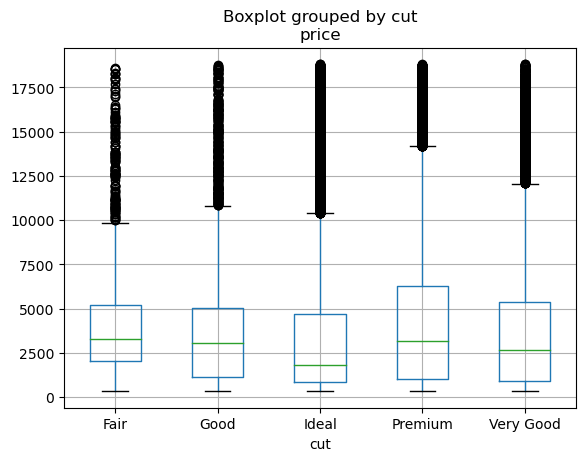

In [244]:
df.boxplot(column='price',by='cut')

<Axes: title={'center': 'price'}, xlabel='clarity'>

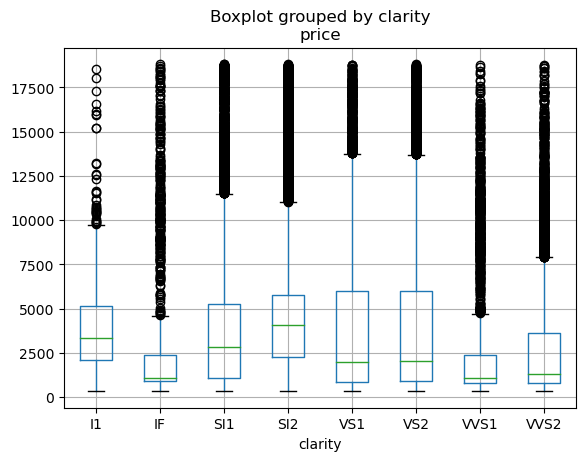

In [246]:
df.boxplot(column='price',by='clarity')

# Question 2


In [259]:
from sklearn.preprocessing import StandardScaler

In [260]:
scaler = StandardScaler()
standardizedDF = pd.DataFrame(scaler.fit_transform(diamondsDF),columns=diamondsDF.columns)